# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

## Reading the dataset

In [2]:
os.chdir('/Users/nishank/Documents/IPBA/capstone/all new/Final Code/Re _IIM-I_Capstone_Project_ _Group_10')
data_main = pd.read_csv("TS Data.csv",index_col=[0],parse_dates=[0])
data_main.head()

,Usage
Date,
2015-04-01,3734.0
2015-04-02,3709.0
2015-04-03,3188.0
2015-04-04,3721.0
2015-04-05,3685.0


## Convering daily data to monthly data

In [3]:
data=data_main.resample('1M').mean()
data.head()

,Usage
Date,
2015-04-30,4109.700347
2015-05-31,5457.000336
2015-06-30,5335.030528
2015-07-31,6506.275874
2015-08-31,6637.765457


In [4]:
data_total=data_main.resample('1M').sum()
data_total.head()

,Usage
Date,
2015-04-30,11835937.00
2015-05-31,16240033.00
2015-06-30,15364887.92
2015-07-31,19362677.00
2015-08-31,19753990.00


## EDA

In [5]:
len(data)

72

In [6]:
data.tail()

,Usage
Date,
2020-11-30,4724.740517
2020-12-31,5395.786771
2021-01-31,5253.099462
2021-02-28,5518.605487
2021-03-31,5364.829288


<AxesSubplot:xlabel='Date'>

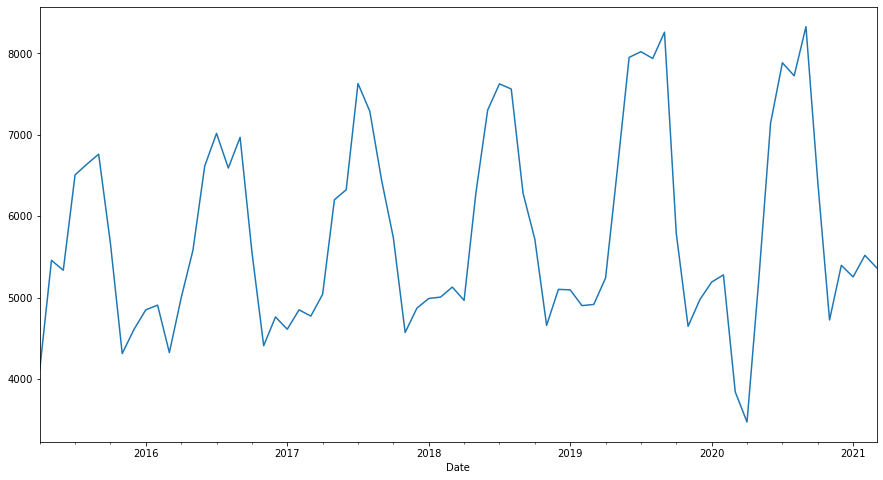

In [7]:
plt.rcParams['figure.figsize'] = [15, 8]
data["Usage"].plot()

In [8]:
data.describe()

,Usage
count,72.000000
mean,5777.441537
std,1191.356648
min,3470.689281
25%,4905.036548
50%,5380.308029
75%,6596.904076
max,8326.878962


# Seasonal Decompose

## Additive Decompose

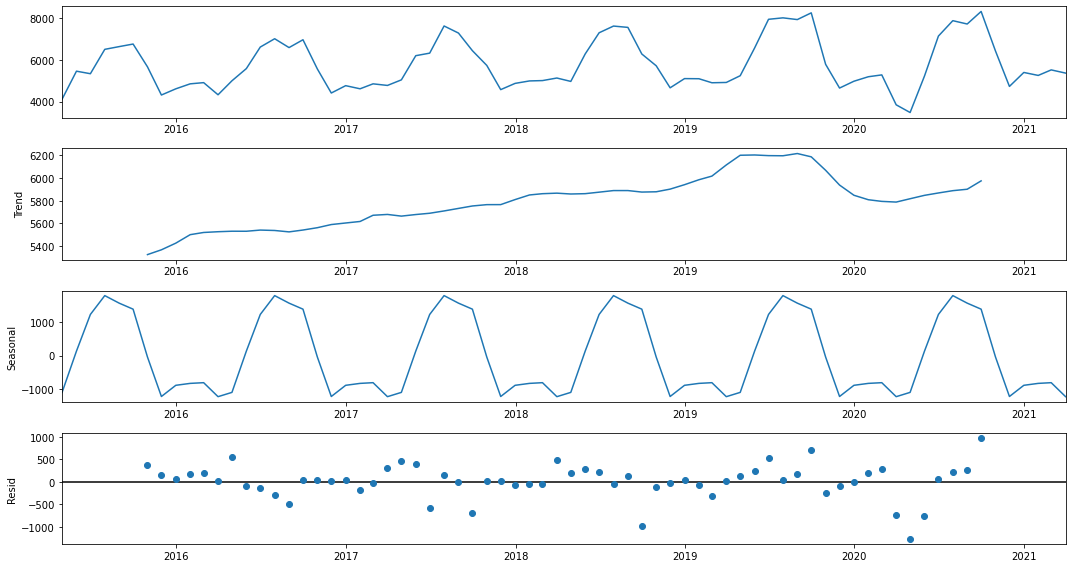

In [9]:
result_a= seasonal_decompose(data,model='additive',period=12)
result_a.plot()
plt.show()

## Multiplicative Decomposition

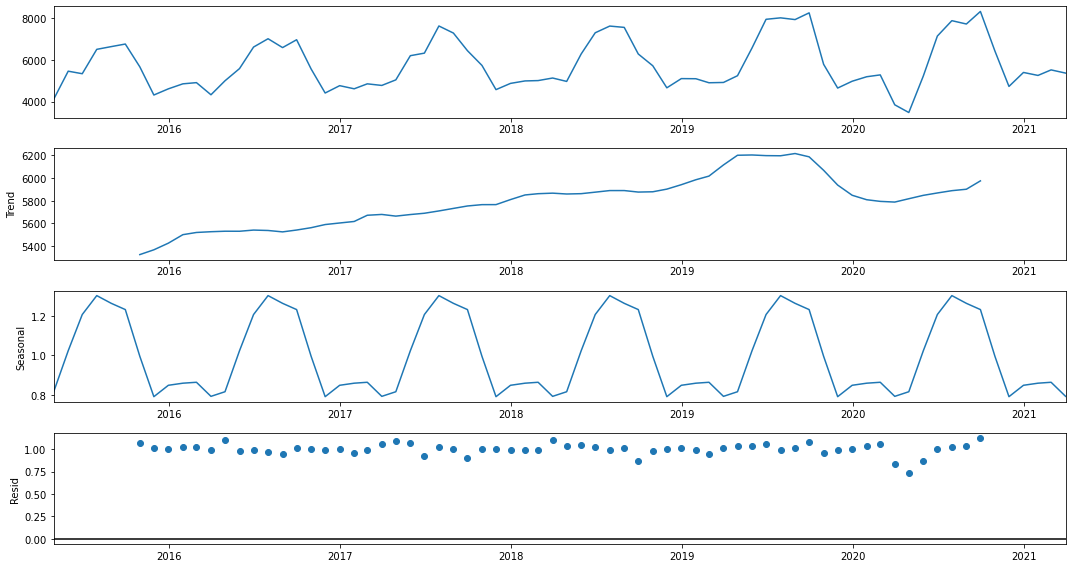

In [10]:
result_m= seasonal_decompose(data,model='multiplicative',period=12)
result_m.plot()
plt.show()

# MODEL SELECTION - HOLT WINTER MODEL

## Holt-Winter Model - Double Exponential Smoothening - Mean Data

/Users/nishank/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive & Multiplicative Trend'}, xlabel='Date'>

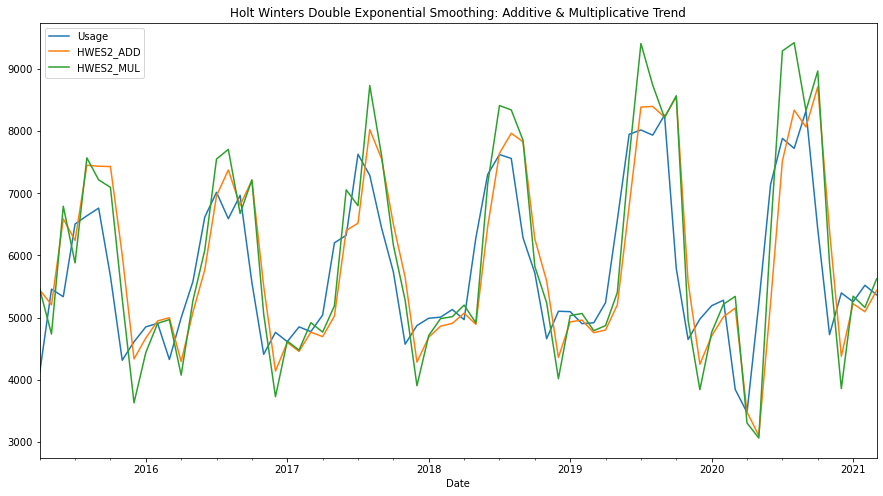

In [11]:
data['HWES2_ADD'] = ExponentialSmoothing(data['Usage'],trend='add').fit().fittedvalues
data['HWES2_MUL'] = ExponentialSmoothing(data['Usage'],trend='mul').fit().fittedvalues
data[['Usage','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive & Multiplicative Trend')

## Holt-Winter Model - Triple Exponential Smoothening - Mean Data

/Users/nishank/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive & Multiplicative Seasonality'}, xlabel='Date'>

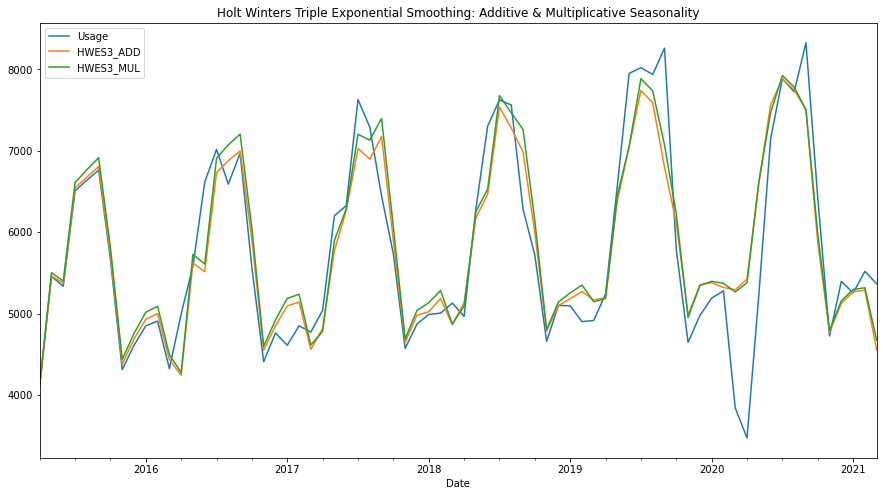

In [13]:
data['HWES3_ADD'] = ExponentialSmoothing(data['Usage'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data['HWES3_MUL'] = ExponentialSmoothing(data['Usage'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
data[['Usage','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive & Multiplicative Seasonality')

## Actual vs Predicted Values - Mean Data

In [15]:
data.head()

,Usage,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,
2015-04-30,4109.700347,5446.137725,5457.000336,4111.684849,4126.885077
2015-05-31,5457.000336,5204.156273,4734.300452,5462.961554,5501.770641
2015-06-30,5335.030528,6589.259632,6790.994155,5372.512238,5399.409660
2015-07-31,6506.275874,6239.577064,5879.390562,6542.927007,6608.880472
2015-08-31,6637.765457,7451.676934,7570.644226,6675.985644,6765.956986


# Predictions of Mean Values of actual data

# Train Test Split

In [17]:
train_data = data[:36]
test_data = data[36:60]
del train_data['HWES3_ADD']
del test_data['HWES3_ADD']
del train_data['HWES3_MUL']
del test_data['HWES3_MUL']

In [18]:
train_data.head()

,Usage,HWES2_ADD,HWES2_MUL
Date,,,
2015-04-30,4109.700347,5446.137725,5457.000336
2015-05-31,5457.000336,5204.156273,4734.300452
2015-06-30,5335.030528,6589.259632,6790.994155
2015-07-31,6506.275874,6239.577064,5879.390562
2015-08-31,6637.765457,7451.676934,7570.644226


In [19]:
train_data.tail()

,Usage,HWES2_ADD,HWES2_MUL
Date,,,
2017-11-30,4570.558160,5646.628355,5276.364188
2017-12-31,4870.394728,4281.751976,3902.404344
2018-01-31,4988.295517,4682.425859,4709.314811
2018-02-28,5005.179249,4859.957812,4981.787447
2018-03-31,5128.214866,4905.319698,5012.658706


In [20]:
test_data.head()

,Usage,HWES2_ADD,HWES2_MUL
Date,,,
2018-04-30,4965.242111,5070.021763,5199.603364
2018-05-31,6284.142671,4889.297360,4913.051981
2018-06-30,7302.410764,6462.552270,7149.390697
2018-07-31,7624.473622,7643.160156,8412.562042
2018-08-31,7561.265282,7967.100042,8342.658292


In [21]:
test_data.tail()

,Usage,HWES2_ADD,HWES2_MUL
Date,,,
2019-11-30,4646.242052,5575.625105,4959.412395
2019-12-31,4974.313639,4247.686502,3837.656449
2020-01-31,5189.756324,4702.747146,4761.340409
2020-02-29,5278.269530,5011.807788,5213.693680
2020-03-31,3841.216250,5152.106773,5340.100067


## Forecasting using Triple HWES-Multiplicative

In [22]:
fitted_model_mul=ExponentialSmoothing(train_data['Usage'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions_mul = fitted_model_mul.forecast(24)
print(test_predictions_mul,test_data)

2018-04-30    5309.934327
2018-05-31    6455.858061
2018-06-30    6725.595695
2018-07-31    7958.254819
2018-08-31    7599.979494
2018-09-30    6939.955128
2018-10-31    6061.082361
2018-11-30    4820.138354
2018-12-31    5148.113825
2019-01-31    5234.859028
2019-02-28    5291.210558
2019-03-31    5232.994998
2019-04-30    5581.812213
2019-05-31    6786.409237
2019-06-30    7069.957908
2019-07-31    8365.731326
2019-08-31    7989.111681
2019-09-30    7295.292918
2019-10-31    6371.420334
2019-11-30    5066.937833
2019-12-31    5411.706219
2020-01-31    5502.892927
2020-02-29    5562.129754
2020-03-31    5500.933456
Freq: M, dtype: float64                   Usage    HWES2_ADD    HWES2_MUL
Date                                             
2018-04-30  4965.242111  5070.021763  5199.603364
2018-05-31  6284.142671  4889.297360  4913.051981
2018-06-30  7302.410764  6462.552270  7149.390697
2018-07-31  7624.473622  7643.160156  8412.562042
2018-08-31  7561.265282  7967.100042  8342.658292
20

/Users/nishank/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:xlabel='Date'>

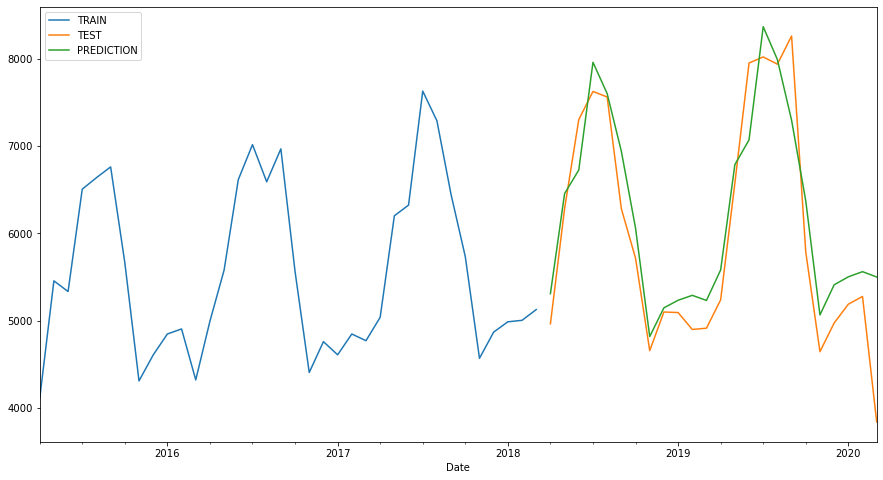

In [23]:
train_data['Usage'].plot(legend=True,label='TRAIN')
test_data['Usage'].plot(legend=True,label='TEST')
test_predictions_mul.plot(legend=True,label='PREDICTION')

<AxesSubplot:xlabel='Date'>

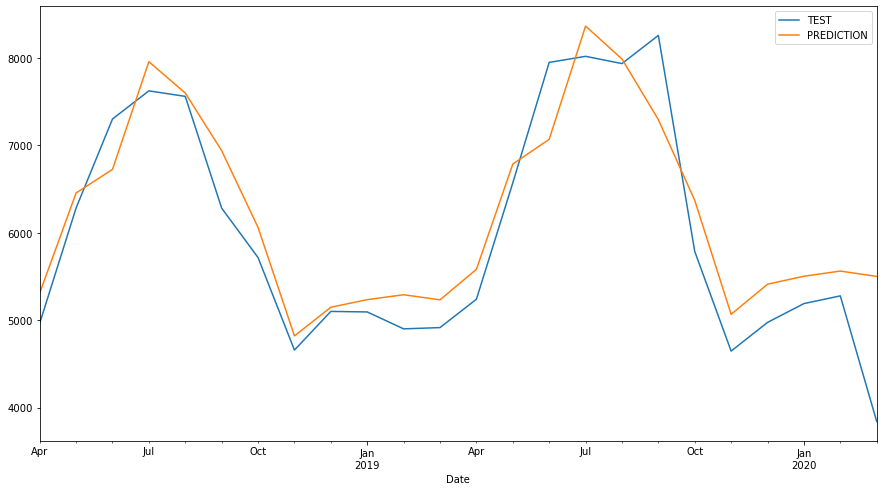

In [24]:
test_data['Usage'].plot(legend=True,label='TEST')
test_predictions_mul.plot(legend=True,label='PREDICTION',xlim=['2018-04-30','2020-03-31 '])

# Evaluation Metrics

In [25]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
mean_absolute_percentage_error(data['Usage'].loc['2018-04-30':'2020-03-31'], fitted_model_mul.predict(start='2018-04-30',end='2020-03-31'))

7.527839034043936

# AutoArima

In [39]:
train_data_aa = data[:36]
test_data_aa = data[36:60]
del train_data_aa['HWES3_ADD']
del test_data_aa['HWES3_ADD']
del train_data_aa['HWES2_MUL']
del test_data_aa['HWES2_MUL']
del train_data_aa['HWES2_ADD']
del train_data_aa['HWES3_MUL']
del test_data_aa['HWES2_ADD']
del test_data_aa['HWES3_MUL']

In [40]:
!pip install pmdarima

In [41]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(train_data_aa['Usage'], start_p = 0, start_q = 0,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = 1, D = None, trace = True,
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True) 
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=360.047, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=351.782, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=354.448, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=1.16 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.77 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=353.790, Time=0.02 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=349.318, Time=0.14 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=348.399, Time=0.03 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=349.333, Time=0.14 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=351.336, Time=0.19 sec
 ARIMA(3,1,0)(0,1,0)[12]             : AIC=350.352, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   36
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -171.200
Date:                            Thu, 01 Jul 2021   AIC                            348.399
Time:                                    03:00:57   BIC                            351.806
Sample:                                         0   HQIC                           349.256
                                             - 36                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8434      0.166     -5.088      0.000      -1.168      -0.519
ar.L2         -0.5614      0.138     -4.076      0.000      -0.831      -0.291
sigma2      1.555e+05   6.95e+04      2.238      0.025    1.93e+04    2.92e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.82   Prob(JB):                         0.48
Heteroskedasticity (H):               0.45   Skew:                            -0.27
Prob(H) (two-sided):                  0.28   Kurtosis:                         1.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Forecasting using AutoArima

In [42]:
prediction=pd.DataFrame(stepwise_fit.predict(n_periods=24),index=test_data_aa.index)
prediction.columns=['Prediction_usage']
prediction

,Prediction_usage
Date,
2018-04-30,5351.708879
2018-05-31,6438.586861
2018-06-30,6648.917366
2018-07-31,7921.568259
2018-08-31,7559.110292
2018-09-30,6749.982300
2018-10-31,6022.714407
2018-11-30,4854.404726
2018-12-31,5168.877243


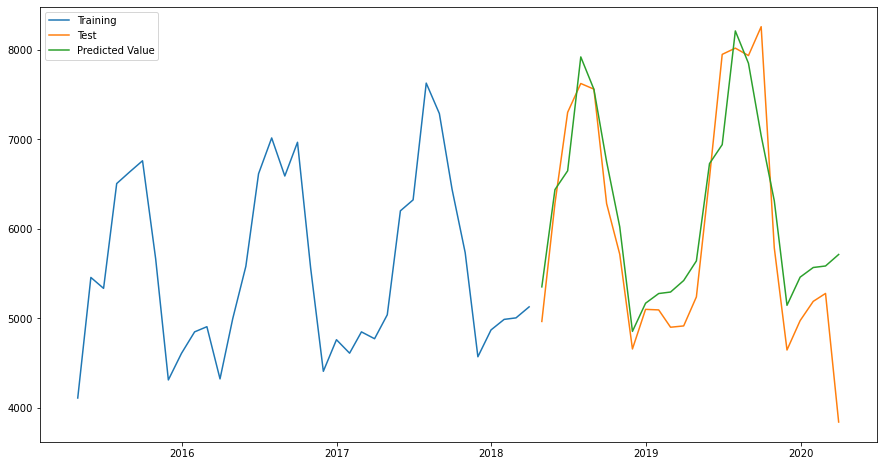

In [43]:
plt.plot(train_data_aa,label='Training')
plt.plot(test_data_aa,label='Test')
plt.plot(prediction,label='Predicted Value')
plt.legend(loc='best')
plt.show()

# Evaluation Metrics

In [44]:
mean_absolute_percentage_error(test_data_aa['Usage'],stepwise_fit.predict(n_periods=24))

8.161240501862185

# SARIMAX

## Train-Test Split


In [45]:
train_data_sa = data[:36]
test_data_sa = data[36:60]
del train_data_sa['HWES3_ADD']
del test_data_sa['HWES3_ADD']
del train_data_sa['HWES2_MUL']
del test_data_sa['HWES2_MUL']
del train_data_sa['HWES2_ADD']
del train_data_sa['HWES3_MUL']
del test_data_sa['HWES2_ADD']
del test_data_sa['HWES3_MUL']

<AxesSubplot:xlabel='Date'>

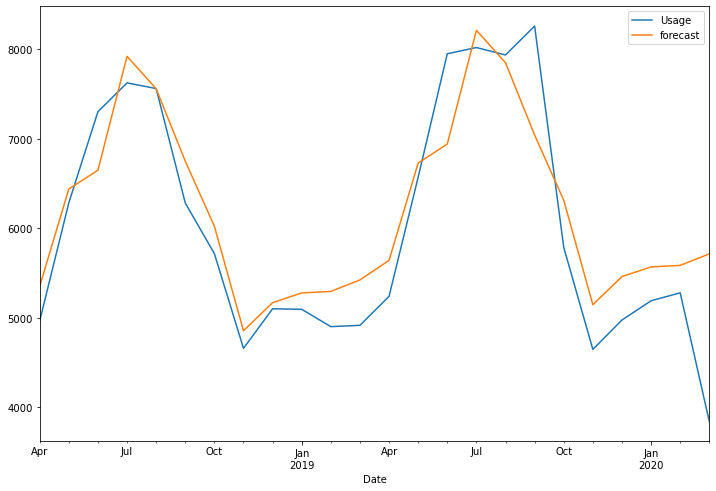

In [46]:
model=sm.tsa.statespace.SARIMAX(train_data_sa['Usage'],order=(2, 1,0),seasonal_order=(0,1,0,12))
model_fit = model.fit()
test_data['forecast']=model_fit.predict(start='2018-04-30',end='2020-03-31')
test_data[['Usage','forecast']].plot(figsize=(12,8))

<AxesSubplot:>

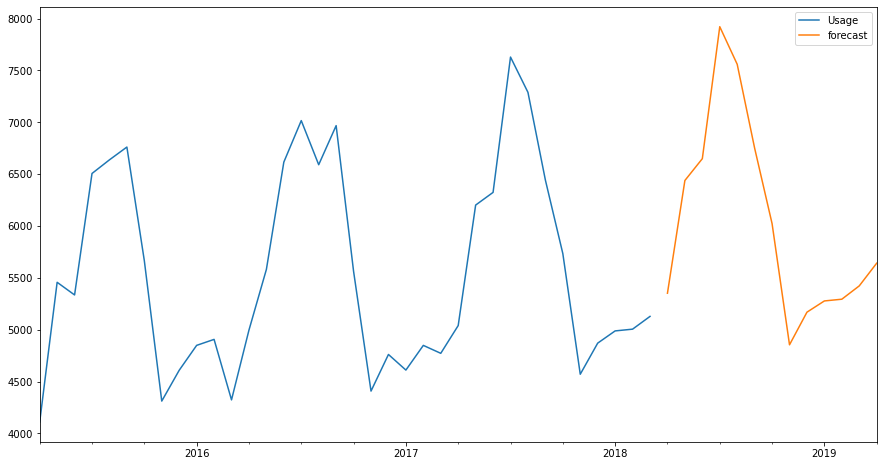

In [47]:
future_dates=[train_data_sa.index[-1]+ DateOffset(months=x)for x in range(0,14)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=train_data_sa.columns)

future_df=pd.concat([train_data_sa,future_datest_df])

future_df['forecast'] = model_fit.predict(start='2018-04-30',end='2020-03-31')
future_df[['Usage', 'forecast']].plot(figsize=(15, 8))

# Evaluation Metrics

In [48]:
mean_absolute_percentage_error(test_data_sa['Usage'].loc['2018-04-30':'2020-03-31'], model_fit.predict(start='2018-04-30',end='2020-03-31'))

8.161240501862185